## Data Setup

In [11]:
import json 
import networkx as nx

with open("./wikivital_mathematics.json") as f:
    data = json.load(f)

G = nx.DiGraph()
for edge, weight in zip(data['edges'], data['weights']):
    G.add_edge(edge[0], edge[1], weight=weight)

topics = {value: key for key, value in data['node_ids'].items()} 

# Centrality Analysis

We will use our previous standard degree centrality, and PageRank. 
We will run PageRank on both the original and reversed graph.

In [35]:
in_deg_rank = sorted(G.nodes, key=lambda x: -G.in_degree(x))
print("In Degree top 10:\t", list((topics[n], G.in_degree(n)) for n in in_deg_rank[:10]))

out_deg_rank = sorted(G.nodes, key=lambda x: -G.out_degree(x))
print("Out Degree top 10:\t", list((topics[n], G.out_degree(n)) for n in out_deg_rank[:10]))

total_deg_rank = sorted(G.nodes, key=lambda x: -G.out_degree(x) - G.in_degree(x))
print("Total Degree top 10:\t", list((topics[n], G.out_degree[n] + G.in_degree[n]) for n in total_deg_rank[:10]))

page_rank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
print("PageRank top 10:\t", list((topics[node], round(value, 2)) for node, value in page_rank)[:10])

rev_page_rank = sorted(nx.pagerank(G.reverse()).items(), key=lambda x: x[1], reverse=True)
print("RevPageRank top 10:\t", list((topics[node], round(value, 2)) for node, value in rev_page_rank)[:10])

In Degree top 10:	 [('Logarithm', 101), ('Eigenvalues and eigenvectors', 99), ('Bijection', 89), ('Laplace transform', 89), ('Factorial', 82), ('Domain of a function', 82), ('Exponential function', 80), ('Natural logarithm', 80), ('Differential form', 79), ('Exponentiation', 79)]
Out Degree top 10:	 [('Mathematics', 533), ('Real number', 290), ('Function (mathematics)', 270), ('Complex number', 214), ('Integer', 201), ('Geometry', 198), ('Calculus', 197), ('Set (mathematics)', 197), ('Continuous function', 186), ('Mathematical analysis', 184)]
Total Degree top 10:	 [('Mathematics', 533), ('Real number', 318), ('Function (mathematics)', 307), ('Complex number', 241), ('Integer', 229), ('Set (mathematics)', 216), ('Continuous function', 204), ('Vector space', 202), ('Geometry', 201), ('Calculus', 201)]
PageRank top 10:	 [('Rotations in 4-dimensional Euclidean space', 0.01), ('24-cell', 0.01), ('Symmetric relation', 0.01), ('Branch point', 0.01), ('Queue (abstract data type)', 0.01), ('La

# Community Detection

We will use greedy modularity search and label propagation.

## Greedy Modularity

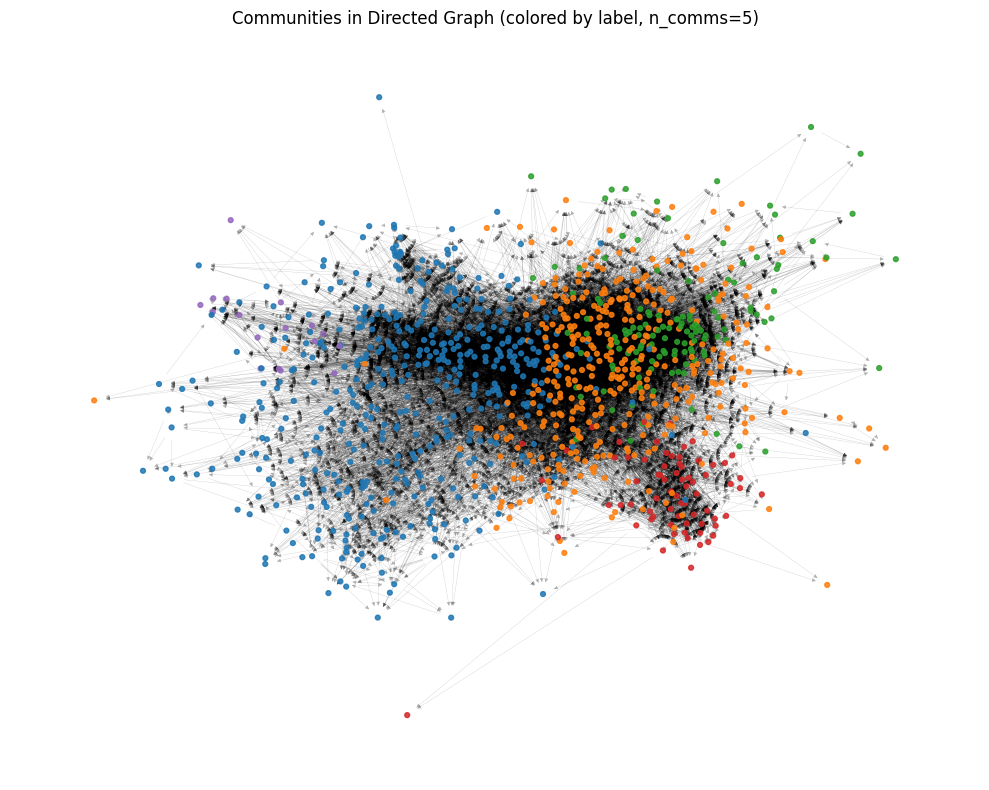

In [37]:
from matplotlib import pyplot as plt
import matplotlib


G_viz = G.copy().to_undirected() # For communities, we need undirected
communities = list(nx.algorithms.community.greedy_modularity_communities(G_viz)) # No need to be perfect on visualizations :)

comm_id = {}
for index, comm in enumerate(communities):
    for v in comm:
        comm_id[v] = index
n_comms = max(comm_id.values()) + 1 if communities else 1

qualitative_maps = [
    "tab10", "Set3", "Accent", "Pastel1", "Dark2",
    "Paired", "tab20", "tab20b", "tab20c"
]
cmap_name = qualitative_maps[min(len(communities) // 10, len(qualitative_maps) - 1)]
cmap = matplotlib.colormaps[cmap_name]


node_colors = [cmap(comm_id.get(n, 0)) for n in G.nodes()]

pos = nx.spring_layout(G)



plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(
    G_viz, pos,
    node_size=12,           # small nodes for large graphs
    node_color=node_colors,
    alpha=0.85
)
nx.draw_networkx_edges(
    G_viz, pos,
    arrows=True,
    arrowstyle='-|>', arrowsize=6,
    width=0.2, alpha=0.25, edge_color='k'
)
# No labels for large graphs
# nx.draw_networkx_labels(G, pos, font_size=6)

plt.title(f"Communities in Directed Graph (colored by label, n_comms={n_comms})")
plt.axis('off')
plt.tight_layout()
plt.show()


## Label Propagation

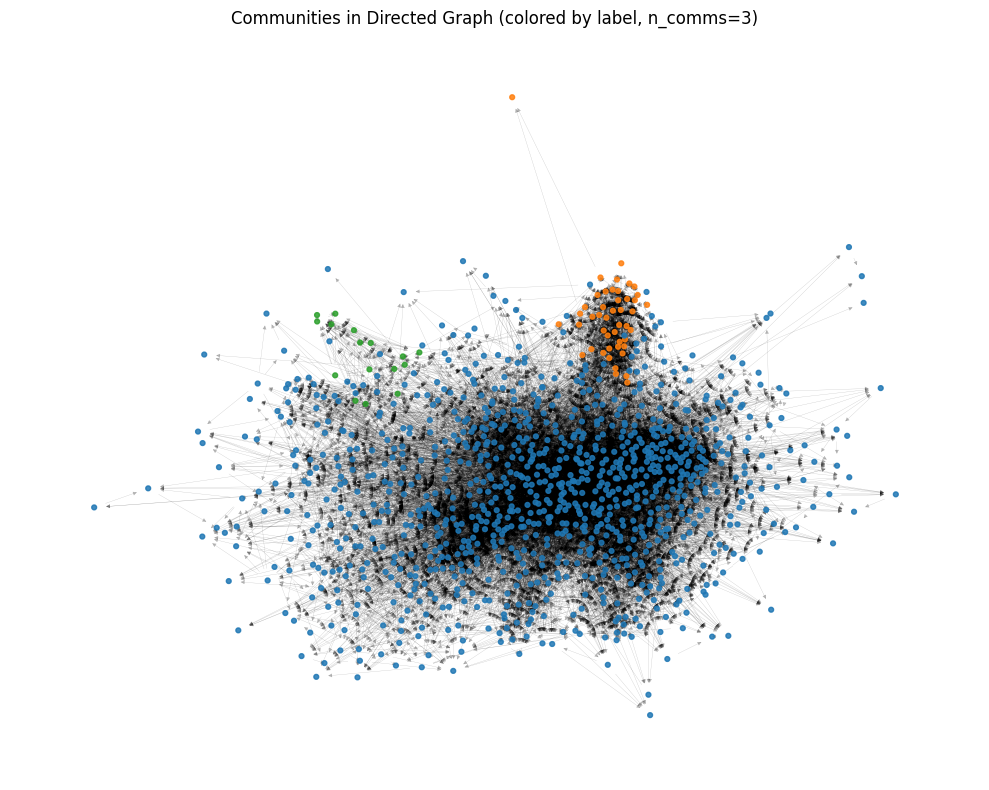

In [38]:
from matplotlib import pyplot as plt
import matplotlib


G_viz = G.copy().to_undirected() # For communities, we need undirected
communities = list(nx.algorithms.community.label_propagation_communities(G_viz)) # No need to be perfect on visualizations :)

comm_id = {}
for index, comm in enumerate(communities):
    for v in comm:
        comm_id[v] = index
n_comms = max(comm_id.values()) + 1 if communities else 1

qualitative_maps = [
    "tab10", "Set3", "Accent", "Pastel1", "Dark2",
    "Paired", "tab20", "tab20b", "tab20c"
]
cmap_name = qualitative_maps[min(len(communities) // 10, len(qualitative_maps) - 1)]
cmap = matplotlib.colormaps[cmap_name]


node_colors = [cmap(comm_id.get(n, 0)) for n in G.nodes()]

pos = nx.spring_layout(G)



plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(
    G_viz, pos,
    node_size=12,           # small nodes for large graphs
    node_color=node_colors,
    alpha=0.85
)
nx.draw_networkx_edges(
    G_viz, pos,
    arrows=True,
    arrowstyle='-|>', arrowsize=6,
    width=0.2, alpha=0.25, edge_color='k'
)
# No labels for large graphs
# nx.draw_networkx_labels(G, pos, font_size=6)

plt.title(f"Communities in Directed Graph (colored by label, n_comms={n_comms})")
plt.axis('off')
plt.tight_layout()
plt.show()


# Diffusion Modeling

Not applicable.

# Model Comparison

generate digraphs

In [ ]:
# Directed Erdos Reyni
import random


n, p = 1068, 0.0237
G_er = nx.gnp_random_graph(n, p, directed=True, seed=42)

# Directed Watts Strogatz
k, beta = 10, 0.1
H = nx.watts_strogatz_graph(n, k, beta, seed=0)  # undirected
G_ws_rand = nx.DiGraph()
G_ws_rand.add_nodes_from(H.nodes())
for u, v in H.edges():
    if random.random() < 0.5:
        G_ws_rand.add_edge(u, v)
    else:
        G_ws_rand.add_edge(v, u)


# Creative or Extended Analysis

LLM semantic grouping. 